In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Inputs
X = np.array([[0,0],[0,1],[1,0],[1,1]])

# Targets
y_and = np.array([0,0,0,1])
y_or  = np.array([0,1,1,1])
y_xor = np.array([0,1,1,0])

In [3]:
class Perceptron:
    def __init__(self, lr=0.1, epochs=10):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def activation(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for i in range(n_samples):
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_pred = self.activation(linear_output)

                # Perceptron update rule
                update = self.lr * (y[i] - y_pred)
                self.weights += update * X[i]
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)


In [4]:
# Initialize models
and_model = Perceptron(lr=0.1, epochs=10)
or_model  = Perceptron(lr=0.1, epochs=10)
xor_model = Perceptron(lr=0.1, epochs=10)

# Train models
and_model.fit(X, y_and)
or_model.fit(X, y_or)
xor_model.fit(X, y_xor)

# Predictions
print("AND predictions:", and_model.predict(X))
print("OR predictions:", or_model.predict(X))
print("XOR predictions:", xor_model.predict(X))


AND predictions: [0 0 0 1]
OR predictions: [0 1 1 1]
XOR predictions: [1 1 0 0]


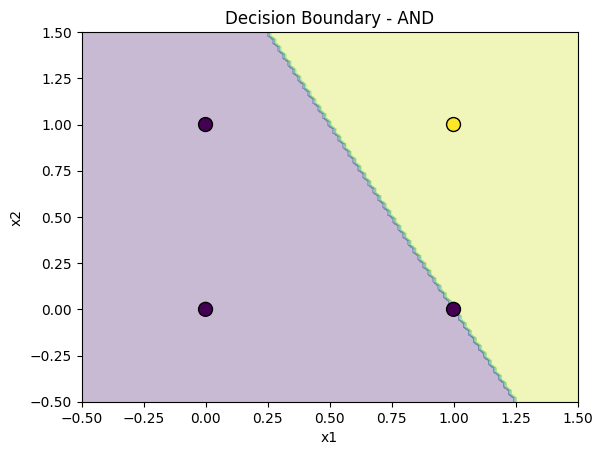

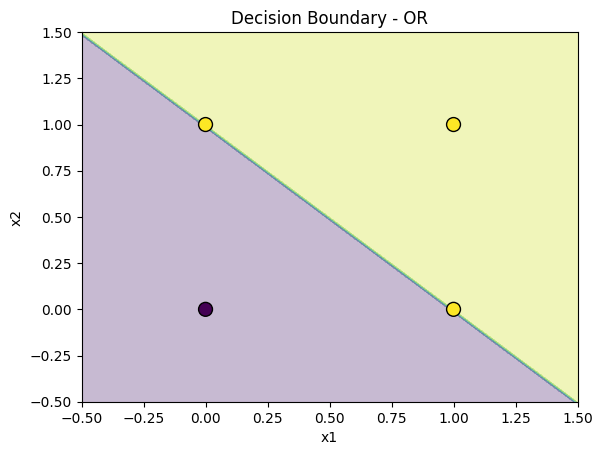

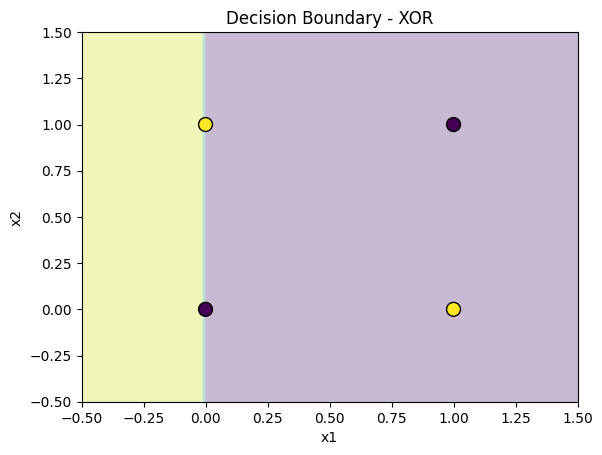

In [5]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, s=100, edgecolors='k')
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

plot_decision_boundary(and_model, X, y_and, "Decision Boundary - AND")
plot_decision_boundary(or_model, X, y_or, "Decision Boundary - OR")
plot_decision_boundary(xor_model, X, y_xor, "Decision Boundary - XOR")
